# Python `holidays` package

- [holidays](https://pypi.org/project/holidays/) is a Python library for generating country- and subdivision- (e.g. state or province) specific sets of government-designated holidays.
    - I've had it in my environment for awhile but am a bit rusty on how it works / why you might use it.

In [1]:
# dependencies
from datetime import date
import holidays

In [2]:
# support methods

In [3]:
# main

## testing autocomplete
\
I'm just going to do `holidays.<TAB>` until I find stuff that gives me information about the package.

In [4]:
holidays?

Type:        module
String form: <module 'holidays' from '/Users/home/opt/miniconda3/lib/python3.12/site-packages/holidays/__init__.py'>
File:        ~/opt/miniconda3/lib/python3.12/site-packages/holidays/__init__.py
Docstring:   <no docstring>

In [5]:
holidays.registry.COUNTRIES

{'afghanistan': ('Afghanistan', 'AF', 'AFG'),
 'albania': ('Albania', 'AL', 'ALB'),
 'algeria': ('Algeria', 'DZ', 'DZA'),
 'american_samoa': ('AmericanSamoa', 'AS', 'ASM', 'HolidaysAS'),
 'andorra': ('Andorra', 'AD', 'AND'),
 'angola': ('Angola', 'AO', 'AGO'),
 'argentina': ('Argentina', 'AR', 'ARG'),
 'armenia': ('Armenia', 'AM', 'ARM'),
 'aruba': ('Aruba', 'AW', 'ABW'),
 'australia': ('Australia', 'AU', 'AUS'),
 'austria': ('Austria', 'AT', 'AUT'),
 'azerbaijan': ('Azerbaijan', 'AZ', 'AZE'),
 'bahamas': ('Bahamas', 'BS', 'BHS'),
 'bahrain': ('Bahrain', 'BH', 'BAH'),
 'bangladesh': ('Bangladesh', 'BD', 'BGD'),
 'barbados': ('Barbados', 'BB', 'BRB'),
 'belarus': ('Belarus', 'BY', 'BLR'),
 'belgium': ('Belgium', 'BE', 'BEL'),
 'belize': ('Belize', 'BZ', 'BLZ'),
 'bolivia': ('Bolivia', 'BO', 'BOL'),
 'bosnia_and_herzegovina': ('BosniaAndHerzegovina', 'BA', 'BIH'),
 'botswana': ('Botswana', 'BW', 'BWA'),
 'brazil': ('Brazil', 'BR', 'BRA'),
 'brunei': ('Brunei', 'BN', 'BRN'),
 'bulgaria': 

In [6]:
holidays.registry.FINANCIAL

{'european_central_bank': ('EuropeanCentralBank', 'XECB', 'ECB', 'TAR'),
 'ice_futures_europe': ('ICEFuturesEurope', 'IFEU'),
 'ny_stock_exchange': ('NewYorkStockExchange', 'XNYS', 'NYSE'),
 'brasil_bolsa_balcao': ('BrasilBolsaBalcao', 'BVMF', 'B3')}

In [7]:
holidays.DEFAULT_START_YEAR

1901

In [8]:
holidays.DEFAULT_END_YEAR

2100

In [9]:
print(holidays.FUTURE_INCOMPATIBILITY_WARNING_TEMPLATE)



This is a future version incompatibility warning from Holidays v{version}
to inform you about an upcoming change in our API versioning strategy that may affect your
project's dependencies. Starting from version 1.0 onwards, we will be following a loose form of
Semantic Versioning (SemVer, https://semver.org) to provide clearer communication regarding any
potential breaking changes.

This means that while we strive to maintain backward compatibility, there might be occasional
updates that introduce breaking changes to our API. To ensure the stability of your projects,
we highly recommend pinning the version of our API that you rely on. You can pin your current
holidays v0.x dependency (e.g., holidays=={version}) or limit it (e.g., holidays<1.0) in order to
avoid potentially unwanted upgrade to the version 1.0 when it's released (ETA 2025Q1-Q2).

If you have any questions or concerns regarding this change, please don't hesitate to reach out
to us via https://github.com/vacanza/holidays

## Thoughts

- This is probably all information that you could also find in the documentation, but nevertheless it's nice to know you can access the possible calendars by loading the package.

## reading the README

These cells are copy-pasted from the [`holidays` documentation](https://pypi.org/project/holidays/), but have been broken up for the interactive format.

In [10]:
us_holidays = holidays.US()  # this is a dict-like object
# the below is the same, but takes a string:
us_holidays = holidays.country_holidays('US')  # this is a dict-like object

nyse_holidays = holidays.NYSE()  # this is a dict-like object
# the below is the same, but takes a string:
nyse_holidays = holidays.financial_holidays('NYSE')  # this is a dict-like object

In [11]:
date(2015, 1, 1) in us_holidays  # True

True

In [12]:
date(2015, 1, 2) in us_holidays  # False

False

In [13]:
us_holidays.get('2014-01-01')  # "New Year's Day"

"New Year's Day"

In [14]:
'2014-01-01' in us_holidays  # True

True

In [15]:
'1/1/2014' in us_holidays    # True

True

In [16]:
1388597445 in us_holidays    # True

True

In [17]:
us_pr_holidays = holidays.country_holidays('US', subdiv='PR')

In [18]:
'2018-01-06' in us_holidays     # False

False

In [19]:
'2018-01-06' in us_pr_holidays  # True

True

## Thoughts

- Can work with countries or financial markets
- Can access country or financial holidays either with `holidays.[type]_holidays('[spec]')` where '[type]' is country or financial and '[spec]' is the specific holiday or financial market code of interest.
    - the docs have the full list of countries and markets available (and they're available to list from `holidays.registry`)
- The result of `holidays.[type]_holidays('[spec]')` is a dict-like object that you can lookup a specific date in, where multiple formats for the date are accepted (ie. `date(2014, 1, 1)`, '2014-01-01', 1388597445), where the statement returns True if date has a holiday associated with it and False if not.
- You can also run `[spec_dict].get([date])` to get the string-like value of the holiday associated with the given date, where the method returns None if there are no associated holidays.

# Building on the examples in the docs

Let's say I'd like to take a 4 day trip in the next 6 months, ideally by taking advantage of a 3-day weekend and just taking off Friday.

I could track down the list of payroll holidays from HR or flip through the google calendar, but this is more fun, and could allow me to generate a more exhaustive list of options now and anytime in the future when this comes up again.

I work in the US, so we can look for all the options in the next 6 months from today using the `us_holidays` dict we loaded from the documentation examples.

In [20]:
# found `relativedelta` in this [SO thread](https://stackoverflow.com/questions/546321/how-do-i-calculate-the-date-six-months-from-the-current-date-using-the-datetime)
from dateutil.relativedelta import *

In [21]:
today = date.today()
tomorrow = today + relativedelta(days=1)
six_months = today + relativedelta(months=+6)
ndays = (six_months - today).days

In [22]:
today

datetime.date(2025, 1, 12)

In [23]:
tomorrow

datetime.date(2025, 1, 13)

In [24]:
six_months

datetime.date(2025, 7, 12)

In [25]:
ndays

181

In [26]:
options = {}
for x in range(ndays+1):
    date = today + relativedelta(days=x)
    if date in us_holidays:
        options[date] = us_holidays.get(date)

In [27]:
options

{datetime.date(2025, 1, 20): 'Martin Luther King Jr. Day',
 datetime.date(2025, 2, 17): "Washington's Birthday",
 datetime.date(2025, 5, 26): 'Memorial Day',
 datetime.date(2025, 6, 19): 'Juneteenth National Independence Day',
 datetime.date(2025, 7, 4): 'Independence Day'}

### Cool, now make it a function

In [28]:
def find_3day_inrange(start, ndays, possible_holidays):
    """Scans the timeline for holidays."""
    options = {}
    for x in range(ndays+1):
        date = start + relativedelta(days=x)
        if date in possible_holidays: options[date] = possible_holidays.get(date)
    return options


def find_3day(start, nmonths, possible_holidays):
    """Defines the timeline based on the parameters, today and nmonths from today."""
    six_months = start + relativedelta(months=+nmonths)
    ndays = (six_months - start).days
    options = find_3day_inrange(start=start, ndays=ndays,
                                possible_holidays=possible_holidays)
    if not any(options): return None
    return options

In [29]:
in_3mos = find_3day(start=date.today(), nmonths=3, possible_holidays=us_holidays)

In [30]:
in_3mos

{datetime.date(2025, 1, 20): 'Martin Luther King Jr. Day',
 datetime.date(2025, 2, 17): "Washington's Birthday"}

### Is there a better way to do this?

Probably, but this works as expected and runs quickly.

# Crossing projects: Emergency events in Chicago

I'm curious about when I might want to check if a given date is a holiday in other work, such as looking for potential peaks in some emergency events surrounding a holiday.

The Office of Emergency Management & Communication's 911 and emergency event records are available in the public `Chi-MP-data-story` repo, let's pull those and look at trends in firework or fire-related events on a holiday like 4th of July or New Years Eve when fireworks are most often deployed.

Note that OEMC data can be the result of both 911 calls and other emergency management systems, such as ShotSpotter. I'll stick to "events" as much as possible but note that there is no way to know which one led to a given record, so for all intents and purposes the terms "event" and "call" will be used interchangeably.

## setup data

In [31]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
oemc = pd.read_parquet("~/git/Chi-MP-data-story/data/oemc_dispatch.parquet")
assert not oemc.call_date.isna().any()

In [33]:
oemc.init_type = oemc.init_type.fillna('none reported')
oemc['call_moday'] = oemc.call_date.dt.month.apply(lambda x: f"{x:02}") + "-" \
    + oemc.call_date.dt.day.apply(lambda x: f"{x:02}")
oemc['holiday'] = oemc.call_date.dt.date.apply(lambda x: x in us_holidays)
oemc['holiday_str'] = oemc.call_date.dt.date.apply(lambda x: us_holidays.get(x))
oemc['july_4th'] = (oemc.call_date.dt.month == 7) & (oemc.call_date.dt.day == 4)
oemc['nye'] = (oemc.call_date.dt.month == 12) & (oemc.call_date.dt.day == 31)
oemc['init_fireworks'] = oemc.init_type.str.contains('fireworks', flags=re.I)
oemc['init_fire'] = oemc.init_type.str.contains('fire[^worksd]', flags=re.I)
oemc['init_explosion'] = oemc.init_type.str.contains('explosion', flags=re.I)

## preview data

In [34]:
oemc.columns

Index(['event_no', 'district', 'call_date', 'disp_date', 'on_date',
       'clear_date', 'close_date', 'init_priority', 'init_type', 'fin_type',
       'call_moday', 'holiday', 'holiday_str', 'july_4th', 'nye',
       'init_fireworks', 'init_fire', 'init_explosion'],
      dtype='object')

In [35]:
oemc.sample().T

,10978773
event_no,2121810563
district,005
call_date,2021-08-06 17:00:00
disp_date,2021-08-06 17:09:00
on_date,2021-08-06 17:18:00
clear_date,2021-08-06 22:29:00
close_date,2021-08-06 22:29:00
init_priority,1A
init_type,DOMESTIC DISTURBANCE
fin_type,DOMESTIC DISTURBANCE


## general trends

In [36]:
oemc.call_date.describe()

count                         12159582
mean     2019-12-17 23:36:37.666096384
min                2018-01-01 00:00:00
25%                2018-12-20 22:14:00
50%                2019-11-20 09:53:00
75%                2020-12-30 16:09:00
max                2021-12-31 23:59:00
Name: call_date, dtype: object

In [37]:
oemc.init_type.value_counts().head(10)

init_type
TRAFFIC STOP (OV)        2628028
Community Interaction     783816
DISTURBANCE               550446
AUTO ACCIDENT PD          455412
DOMESTIC DISTURBANCE      416915
MISSION                   337449
ALARM BURGLAR             299204
EL CHECK [OV]             281068
PARKING VIOL. 1           251685
CHECK WELL BEING          251537
Name: count, dtype: int64

## trends in firework-related calls overtime

In [38]:
events_gb = oemc[['call_moday', 'init_fireworks']].groupby('call_moday')
counts = events_gb.value_counts().to_frame().reset_index()
props = events_gb.value_counts(normalize=True).to_frame().reset_index()

x_mo = props.loc[props.init_fireworks, 'call_moday'].str[:2].values
x_moday = props.loc[props.init_fireworks, 'call_moday'].values
y_counts = counts.loc[counts.init_fireworks, 'count'].values
y_percs = props.loc[props.init_fireworks, 'proportion'].apply(
    lambda x: round(x*100,1)).values

### preview

In [39]:
counts

,call_moday,init_fireworks,count
0,01-01,False,32130
1,01-01,True,79
2,01-02,False,30124
3,01-02,True,13
4,01-03,False,30876
...,...,...,...
710,12-29,True,5
711,12-30,False,28569
712,12-30,True,3
713,12-31,False,28004


In [40]:
props.loc[props.init_fireworks]

,call_moday,init_fireworks,proportion
1,01-01,True,0.002453
3,01-02,True,0.000431
5,01-03,True,0.000097
7,01-04,True,0.000032
9,01-05,True,0.000127
...,...,...,...
706,12-27,True,0.000180
708,12-28,True,0.000176
710,12-29,True,0.000179
712,12-30,True,0.000105


### rough visual of proportion

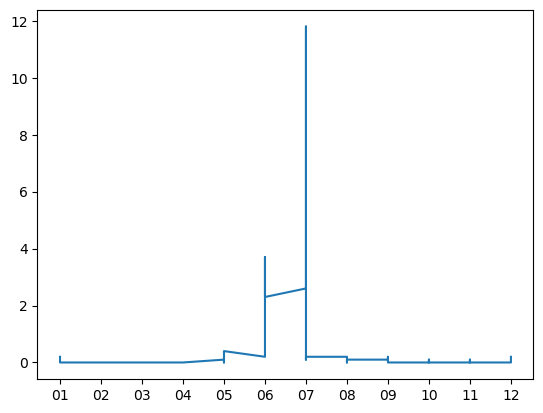

In [41]:
plt.plot(x_mo, y_percs)

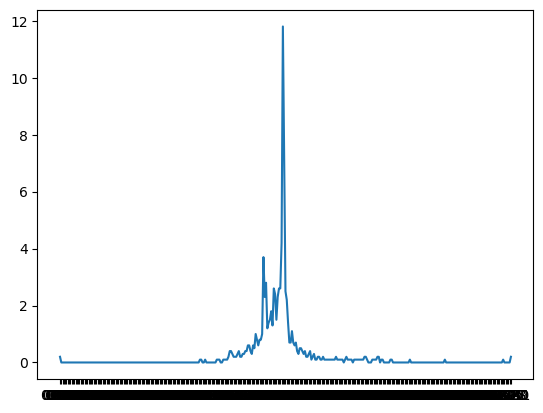

In [42]:
plt.plot(x_moday, y_percs)

### Thoughts

- There actually doesn't appear to be an obvious uptick in firework-related calls around NYE as expected, but the trend around July 4th appears to start increasing as early as the beginning of May and returns to normal around the beginning of August. I wonder if looking closer and labeling the holidays on the xaxis would help elaborate.

### Trends by US holiday

I think the `holidays` package would be a great tool to help refine the daily trend analysis and clarify any additional holidays associated with upticks in emergency events.

#### looking closer at `holidays` coverage?

Looking at the keys in the `us_holidays` dict, it seems like the package might be missing holidays. This could have implications for using it to explore holiday-related trends in these data.

In [43]:
{date.year for date in us_holidays}

{2014, 2015, 2018, 2019, 2020, 2021, 2025}

- Shoot, does that mean the package doesn't cover holidays in other years? 2016, 2017, 2022, 2023, 2024?

In [44]:
oemc.call_date.dt.year.unique()

array([2018, 2019, 2020, 2021], dtype=int32)

#### Thoughts

- I can't tell from this data if the package is missing holidays in other years because the timeline of this data happens to be fully covered by the package.
- However, the [pypi page](https://pypi.org/project/holidays/) shows an update in January 2025, so it appears to be actively maintained, and this might be mentioned in the rest of the [documentation](https://holidays.readthedocs.io/en/latest/examples.html).

#### setting up holidays

In [45]:
def dedupe_holidays(spec):
    """
    Holidays may be observed on a different date year-to-year, such as
    - when a holiday lands on a weekend
    - when a holiday is not a specific month-day, ie) Thanksgiving

    "observed" sometimes appears in the labels, but not always.
    We need to clean up the list of observed holidays to remove these variations,
    so the axis is more readable. Shouldn't have a big effect on the axis labels.
    """
    holiday_moday = {
        f"{key.month:02}-{key.day:02}": spec.get(key)
        for key in spec.keys()
    }
    holiday_moday = {
        k:v for k,v in holiday_moday.items()
        if 'observed' not in v}
    onlyfirst = {}
    for k,v in holiday_moday.items():
        if v not in onlyfirst.values(): onlyfirst[k] = v
    return onlyfirst

In [46]:
# potential alternative from the docs
us_holidays.observed = False

In [47]:
holiday_moday = dedupe_holidays(spec=us_holidays)

In [48]:
holiday_moday

{'01-01': "New Year's Day",
 '05-28': 'Memorial Day',
 '07-04': 'Independence Day',
 '09-03': 'Labor Day',
 '11-11': 'Veterans Day',
 '11-22': 'Thanksgiving',
 '12-25': 'Christmas Day',
 '01-15': 'Martin Luther King Jr. Day',
 '02-19': "Washington's Birthday",
 '10-08': 'Columbus Day',
 '06-19': 'Juneteenth National Independence Day'}

#### count &  proportion of daily events

[]

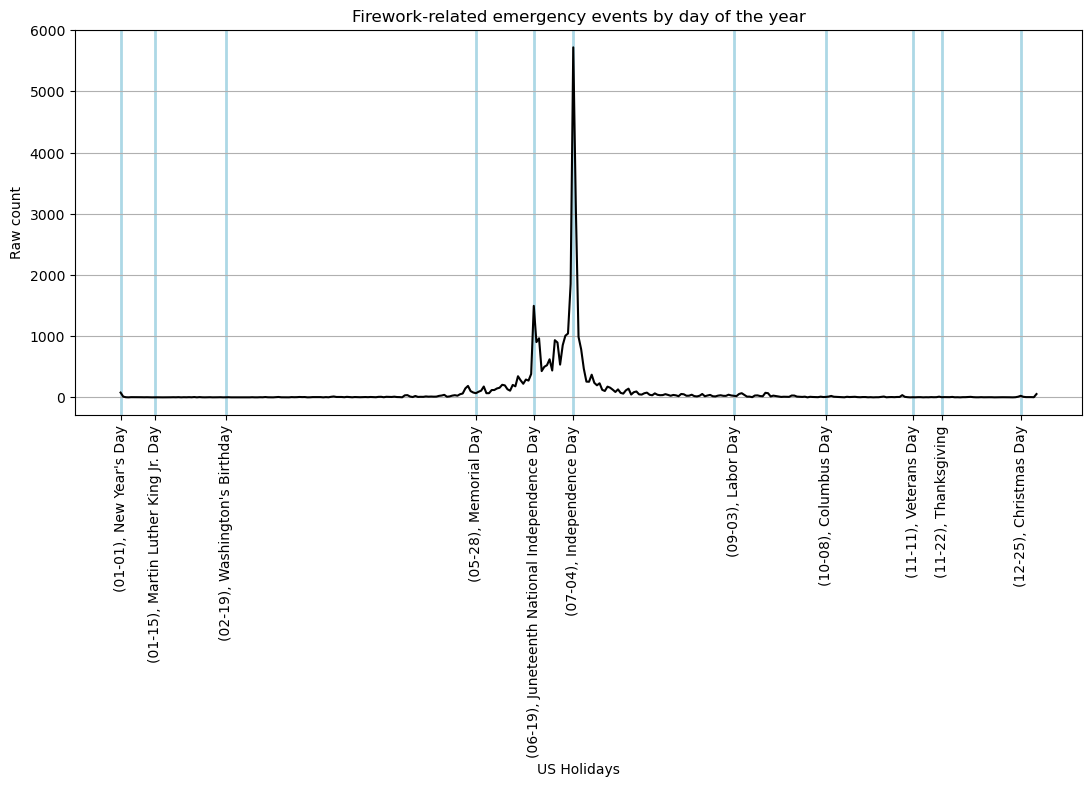

In [49]:
fig, ax = plt.subplots()

fig.set_size_inches(13, 5)
ax.plot(x_moday, y_counts, color='black')
ax.xaxis.grid(color='lightblue', linestyle='-', linewidth=2)
ax.yaxis.grid(True)
ax.set_xticks(
    sorted(holiday_moday.keys()),
    labels=[f"({k}), {holiday_moday[k]}" for k in sorted(holiday_moday.keys())],
    rotation=90) # text rotates from the center w/o anchoring to axis, so other degrees may be confusing to interpret
plt.title('Firework-related emergency events by day of the year')
plt.xlabel('US Holidays')
plt.ylabel('Raw count')
plt.plot()

[]

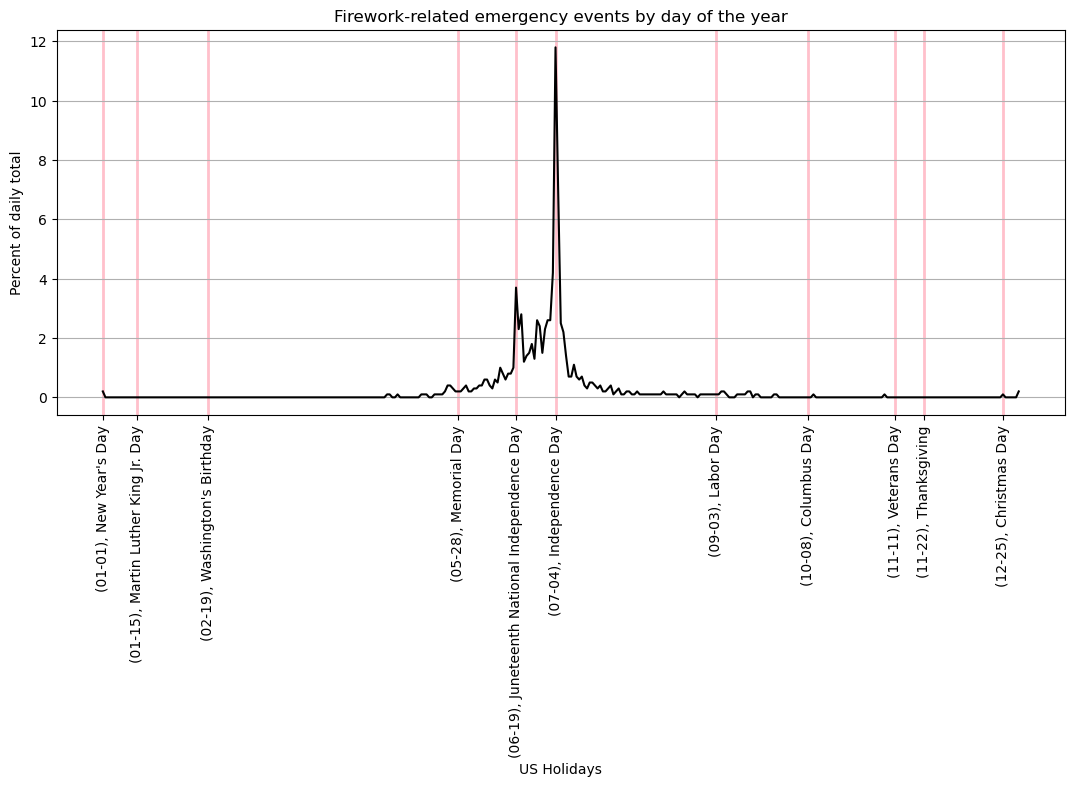

In [50]:
fig, ax = plt.subplots()

fig.set_size_inches(13, 5)
ax.plot(x_moday, y_percs, color='black')
ax.xaxis.grid(color='pink', linestyle='-', linewidth=2)
ax.yaxis.grid(True)
ax.set_xticks(
    sorted(holiday_moday.keys()),
    labels=[f"({k}), {holiday_moday[k]}" for k in sorted(holiday_moday.keys())],
    rotation=90) # text rotates from the center w/o anchoring to axis, so other degrees may be confusing to interpret
plt.title('Firework-related emergency events by day of the year')
plt.xlabel('US Holidays')
plt.ylabel('Percent of daily total')
plt.plot()

#### Thoughts

- Juneteenth and 4th of July are the biggest days for firework-related calls. The rate of firework-related calls on 4th of July is more than 3x the rate of calls for Juneteenth.
- A handful of other holidays have comparatively small but observable increases in the proportion of firework-related emergency events for the day, such as New Year's Even and Memorial Day.
- The periods between 1) Memorial Day and Juneteenth and 2) Juneteenth and 4th of July see rising rates of firework-related calls, while the cool-off period is roughly the 1 month following 4th of July.

## Trends regardless of emergency type

### quantity of events

In [51]:
# if you count month-day, either account or acknowledge covering 4 years of data
desc = oemc.call_moday.value_counts().describe()

In [52]:
desc

count      366.000000
mean     33222.901639
std       3136.133362
min       9611.000000
25%      31497.500000
50%      33164.000000
75%      34888.750000
max      48620.000000
Name: count, dtype: float64

In [53]:
f"{desc['mean']:,.0f} calls per day on average, with a \
range between {desc['min']:,.0f} to {desc['max']:,.0f} and a standard deviation of {desc['std']:,.0f}."

'33,223 calls per day on average, with a range between 9,611 to 48,620 and a standard deviation of 3,136.'

In [54]:
highest_count = oemc.call_moday.value_counts().max()
highest_day = {moday for moday, count in oemc.call_moday.value_counts().items() if count == highest_count}

In [55]:
highest_day, highest_count

({'07-04'}, np.int64(48620))

In [56]:
f"{oemc.loc[oemc.july_4th].call_date.dt.year.value_counts().mean():,.0f} calls per year on average for July 4th"

'12,155 calls per year on average for July 4th'

In [57]:
f"{oemc.call_date.dt.month.value_counts().mean():,.0f} calls per month on average"

'1,013,298 calls per month on average'

In [58]:
f"{oemc.call_date.dt.year.value_counts().mean():,.0f} calls per year on average"

'3,039,896 calls per year on average'

<Axes: title={'center': 'total emergency events by year'}, xlabel='year', ylabel='count (in millions)'>

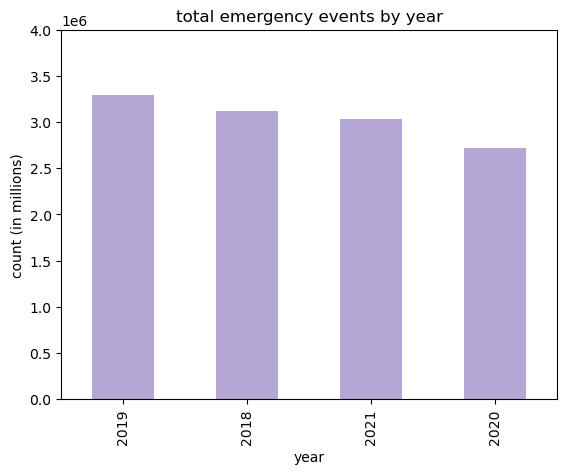

In [59]:
oemc.call_date.dt.year.astype(str).value_counts().plot(
    kind='bar', ylim=(0,4000000), color='#B4A7D6',
    title='total emergency events by year', xlabel='year', ylabel='count (in millions)')

### How do US holidays intersect with daily trends?

[]

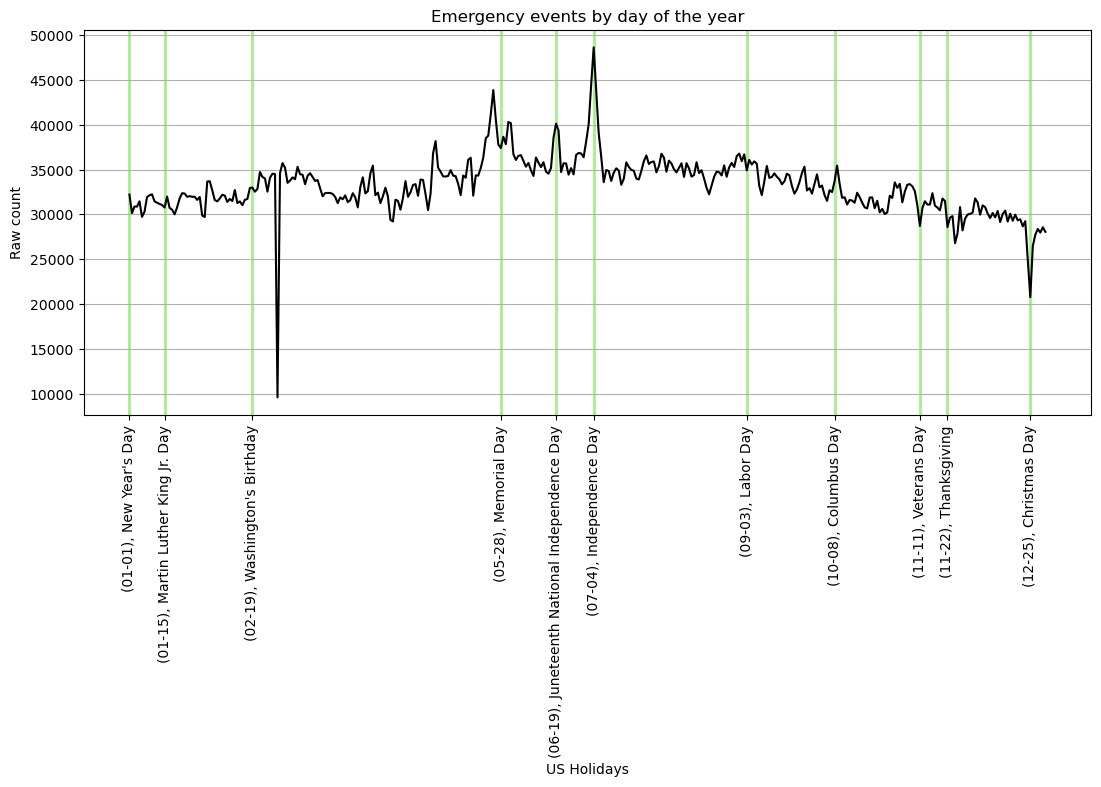

In [60]:
x_moday = oemc.call_moday.value_counts().sort_index().index
y_total = oemc.call_moday.value_counts().sort_index().values

fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
ax.plot(x_moday, y_total, color='black')
ax.xaxis.grid(color='#A3F088', linestyle='-', linewidth=2)
ax.yaxis.grid(True)
ax.set_xticks(
    sorted(holiday_moday.keys()),
    labels=[f"({k}), {holiday_moday[k]}" for k in sorted(holiday_moday.keys())],
    rotation=90) # text rotates from the center w/o anchoring to axis, so other degrees may be confusing to interpret
plt.title('Emergency events by day of the year')
plt.xlabel('US Holidays')
plt.ylabel('Raw count')
plt.plot()

### I'm curious if the some of the smaller peaks are non-US holidays?

From the docs:
> Holiday objects can be added together and the resulting object will generate the holidays from all of the initial objects:

In [61]:
north_america = holidays.CA() + holidays.US() + holidays.MX()
north_america.get('2014-07-01') # "Canada Day"
north_america.get('2014-07-04') # "Independence Day"

'Independence Day'

In [62]:
north_america.country

['CA', 'US', 'MX']

#### Can I use the the key method tho?

In [63]:
canada = holidays.country_holidays(country='CA')
usa = holidays.country_holidays(country='US')
mexico = holidays.country_holidays(country='MX')
north_america = canada + usa + mexico

In [64]:
north_america.get('2014-07-01') # "Canada Day"

'Canada Day'

#### all countries

In [65]:
countries = {
    label: tup[0]
    for label, tup in holidays.registry.COUNTRIES.items()}

In [66]:
none_found = []
mega_holiday_moday = None
for label, countrycode in countries.items():
    found = holidays.country_holidays(
        country=countrycode, years=range(2018, 2022))
    if not any(found):
        none_found.append(label)
        continue
    if mega_holiday_moday:
        try: mega_holiday_moday += found
        except:
            print(f'error processing holidays for {label}')
            continue
    else: mega_holiday_moday = found

/Users/home/opt/miniconda3/lib/python3.12/site-packages/holidays/countries/marshall_islands.py:38: Warning: Years before 2020 are not available for the Marshall Islands (MH).
  warnings.warn(


error processing holidays for vietnam


In [67]:
assert mega_holiday_moday

In [68]:
len(mega_holiday_moday.country)

155

In [69]:
mega_holiday_moday = dedupe_holidays(spec=mega_holiday_moday)

In [70]:
# Un-comment if you want to find out

#x_moday = oemc.call_moday.value_counts().sort_index().index
#y_total = oemc.call_moday.value_counts().sort_index().values
#
#fig, ax = plt.subplots()
#fig.set_size_inches(13, 5)
#ax.plot(x_moday, y_total, color='black')
#ax.xaxis.grid(color='lightblue', linestyle='-', linewidth=2)
#ax.yaxis.grid(True)
#ax.set_xticks(
#    sorted(mega_holiday_moday.keys()),
#    labels=[f"({k}), {mega_holiday_moday[k]}"
#            for k in sorted(mega_holiday_moday.keys())],
#    rotation=90) # text rotates from the center w/o anchoring to axis, so other degrees may be confusing to interpret
#plt.title('Emergency events by day of the year')
#plt.xlabel('All Country Holidays in `holidays` Python package')
#plt.ylabel('Raw count')
#plt.plot()

### re-thinking that approach

Let's suppose a holiday is a factor in the quantity of emergency events if the difference between that day and the day before is an increase of more than 2 standard deviations from the mean.

In [71]:
vc = oemc.call_moday.value_counts().sort_index().to_frame().reset_index()

In [72]:
vc['count']

0      32209
1      30137
2      30879
3      30870
4      31457
       ...  
361    27750
362    28379
363    27974
364    28572
365    28059
Name: count, Length: 366, dtype: int64

In [73]:
def daily_increase(x):
    """Note that this does disregard decreases."""
    if x.iloc[1] <= x.iloc[0]: return np.nan
    return x.iloc[1] - x.iloc[0]

In [74]:
vc['count']

0      32209
1      30137
2      30879
3      30870
4      31457
       ...  
361    27750
362    28379
363    27974
364    28572
365    28059
Name: count, Length: 366, dtype: int64

In [75]:
vc['daily_change'] = vc['count'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
vc['daily_increase'] = vc['count'].rolling(window=2).apply(daily_increase)

In [76]:
normal = round(desc['std']*2)
lowerlim = round(desc['mean'] - normal)
upperlim = round(desc['mean'] + normal)

In [77]:
lowerlim, upperlim

(26951, 39495)

In [78]:
vc['lefttail'] = vc['count'] < lowerlim
vc['righttail'] = vc['count'] > upperlim
vc['eithertail'] = vc.lefttail | vc.righttail

In [79]:
vc.loc[vc.eithertail, ['call_moday', 'count', 'daily_increase', 'lefttail', 'righttail']]

,call_moday,count,daily_increase,lefttail,righttail
59,02-29,9611,NaN,True,False
144,05-24,41178,2391.0,False,True
145,05-25,43857,2679.0,False,True
146,05-26,40600,NaN,False,True
151,05-31,40302,2474.0,False,True
152,06-01,40165,NaN,False,True
170,06-19,40114,1574.0,False,True
183,07-02,40040,1913.0,False,True
184,07-03,44440,4400.0,False,True
185,07-04,48620,4180.0,False,True


In [ ]:
ax.sca

In [80]:
#x_moday = oemc.call_moday.value_counts().sort_index().index
#y_norm = oemc.loc[~oemc.eithertail].call_moday.value_counts().sort_index().values
#y_tail = oemc.loc[oemc.eithertail].call_moday.value_counts().sort_index().values
#
#fig, ax = plt.subplots()
#fig.set_size_inches(13, 5)
#ax.plot(x_moday, y_norm, color='black')
#ax.plot(x_moday, y_tail, color='black')
#ax.xaxis.grid(color='lightblue', linestyle='-', linewidth=2)
#ax.yaxis.grid(True)
#ax.set_xticks(
#    sorted(mega_holiday_moday.keys()),
#    labels=[f"({k}), {mega_holiday_moday[k]}"
#            for k in sorted(mega_holiday_moday.keys())],
#    rotation=90) # text rotates from the center w/o anchoring to axis, so other degrees may be confusing to interpret
#plt.title('Emergency events by day of the year')
#plt.xlabel('All Country Holidays in `holidays` Python package')
#plt.ylabel('Raw count')
#plt.plot()